In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
/kaggle/input/acea-water-prediction/Aquifer_Auser.csv
/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
/kaggle/input/acea-water-prediction/datasets_description.ods
/kaggle/input/acea-water-prediction/Lake_Bilancino.csv
/kaggle/input/acea-water-prediction/datasets_description.xlsx
/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
/kaggle/input/acea-water-prediction/Aquifer_Luco.csv
/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
/kaggle/input/acea-water-prediction/River_Arno.csv


The problem of defining the use of water has always been linked to the need to meet the water needs for civil uses, agriculture and industry. 
In Italy the most widely used sources of supply are surface waters that flow into the riverbeds of a hydrographic network, groundwater flowing through permeable areas of the subsoil. In this analysis an attempt is made to reconstruct the hydrographic trend in engineering terms using the data recorded by the pluviographs managed by the Acea company shared in this challenge. 

The analysis of the Datasets is based on the following parts:
•	Screening Datasets; 
•	Climatic evaluation of the areas of interest;
•	Statistical evaluation by structuring the correlations; 
•	Data training and error evaluation with MSE and RMSE indexes; 
•	Estimation of the time of exhaustion of the water resource.

Aquifer Auser Analysis:

In [2]:

df = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Auser.csv',index_col='Date')
df_time = pd.to_datetime(df.index)
datetime_index = pd.DatetimeIndex(df_time.values)
df = df.set_index(datetime_index)
df.head()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
1998-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete NaN values and Estimated climatic trend:

In [3]:
df = df.dropna(subset=['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico'])
rain_df = df[['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico']]
temp_df = df[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']]


Detection zones chart


![1](https://imagizer.imageshack.com/img922/920/USigXi.png)

Water deficit evaluated with potential evapotranspiration index followed by S.I.I.
    

      hjm < Epjm  Deficit

In [4]:
rain_media = rain_df.resample('Y').mean()


# Sommo su tutti gli acquiferi che influenzano la falda
temp_df = df[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']]
temp_media = temp_df.resample('Y').mean()
h = rain_df.resample('m').mean()
temp_magg0 = np.array(temp_media[temp_media>0]*4.75,dtype = float)    
app = (temp_df.resample('m').mean())**1.514/5
i = app.resample('Y').sum()
a = 0.49239+0.01792*i+0.0000771*i**2+6.75*10**-7*i**3
kj = np.array([0.82,0.81,1.03,1.11,1.26,1.27,1.29,1.19,1.05,0.93,0.77,0.78],dtype=float)
# kj Font S.I.I. sun exposure, Latitude: 42,5°

In [5]:
app = temp_df.resample('m').mean()
kpj = np.concatenate((kj,kj,kj)*5,axis=0)
kpj = np.concatenate((kj,kj,kj)*int(np.size(temp_media,0)/3),0)
kpj = kpj.repeat(4).reshape(np.size(h,0),np.size(temp_media,1))
aa = a.to_numpy(dtype=float).repeat(12,axis=0).reshape(np.size(h,0),np.size(temp_media,1))

#potential evapotranspiration
Epj = kpj*135*(app/26.5)**aa
Epj.head()


,Temperature_Orentano,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico
2006-01-31,0.033917,2.006106,0.289394,0.026475
2006-02-28,0.183588,3.265906,0.700998,0.139821
2006-03-31,0.350184,3.505784,1.073251,0.348089
2006-04-30,2.718420,16.004968,5.143549,3.068024
2006-05-31,7.736739,34.142939,9.564550,7.170967


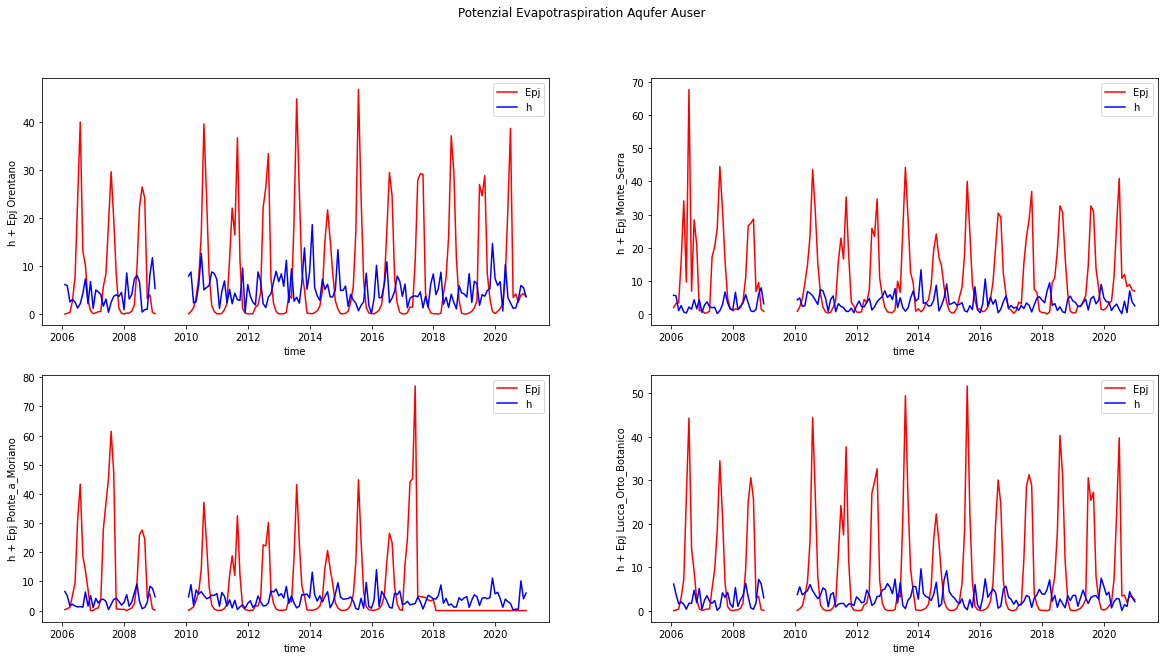

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
fig.suptitle('Potenzial Evapotraspiration Aqufer Auser')
T = Epj.iloc[:,:].values
H = h.iloc[:,:].values
for d in range(1,np.size(temp_media,1)+1):
    temp = T[:,d-1]
    alt = H[:,d-1]
    plt.subplot(2,2,d)
    ylab = 'h + Epj '+ temp_media.columns[d-1][12:]
    plt.plot(Epj.index,temp,color='red',label='Epj')
    plt.plot(h.index,alt,color='blue',label='h')
    plt.ylabel(ylab),plt.xlabel('time')
    plt.legend(loc='best')
    

The graph represents the Water Deficit which can be quantified through the area underlying the two trends.
As can be seen in the datasets, some values relating to the year 2009 are missing.
This water deficit is important in order to estimate the amount of rain reaching the aquifer.

Exploratory Data Analysis (EDA)

Create a dispersion matrix to represent the pairwise correlations between the different characteristics of the datasets.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


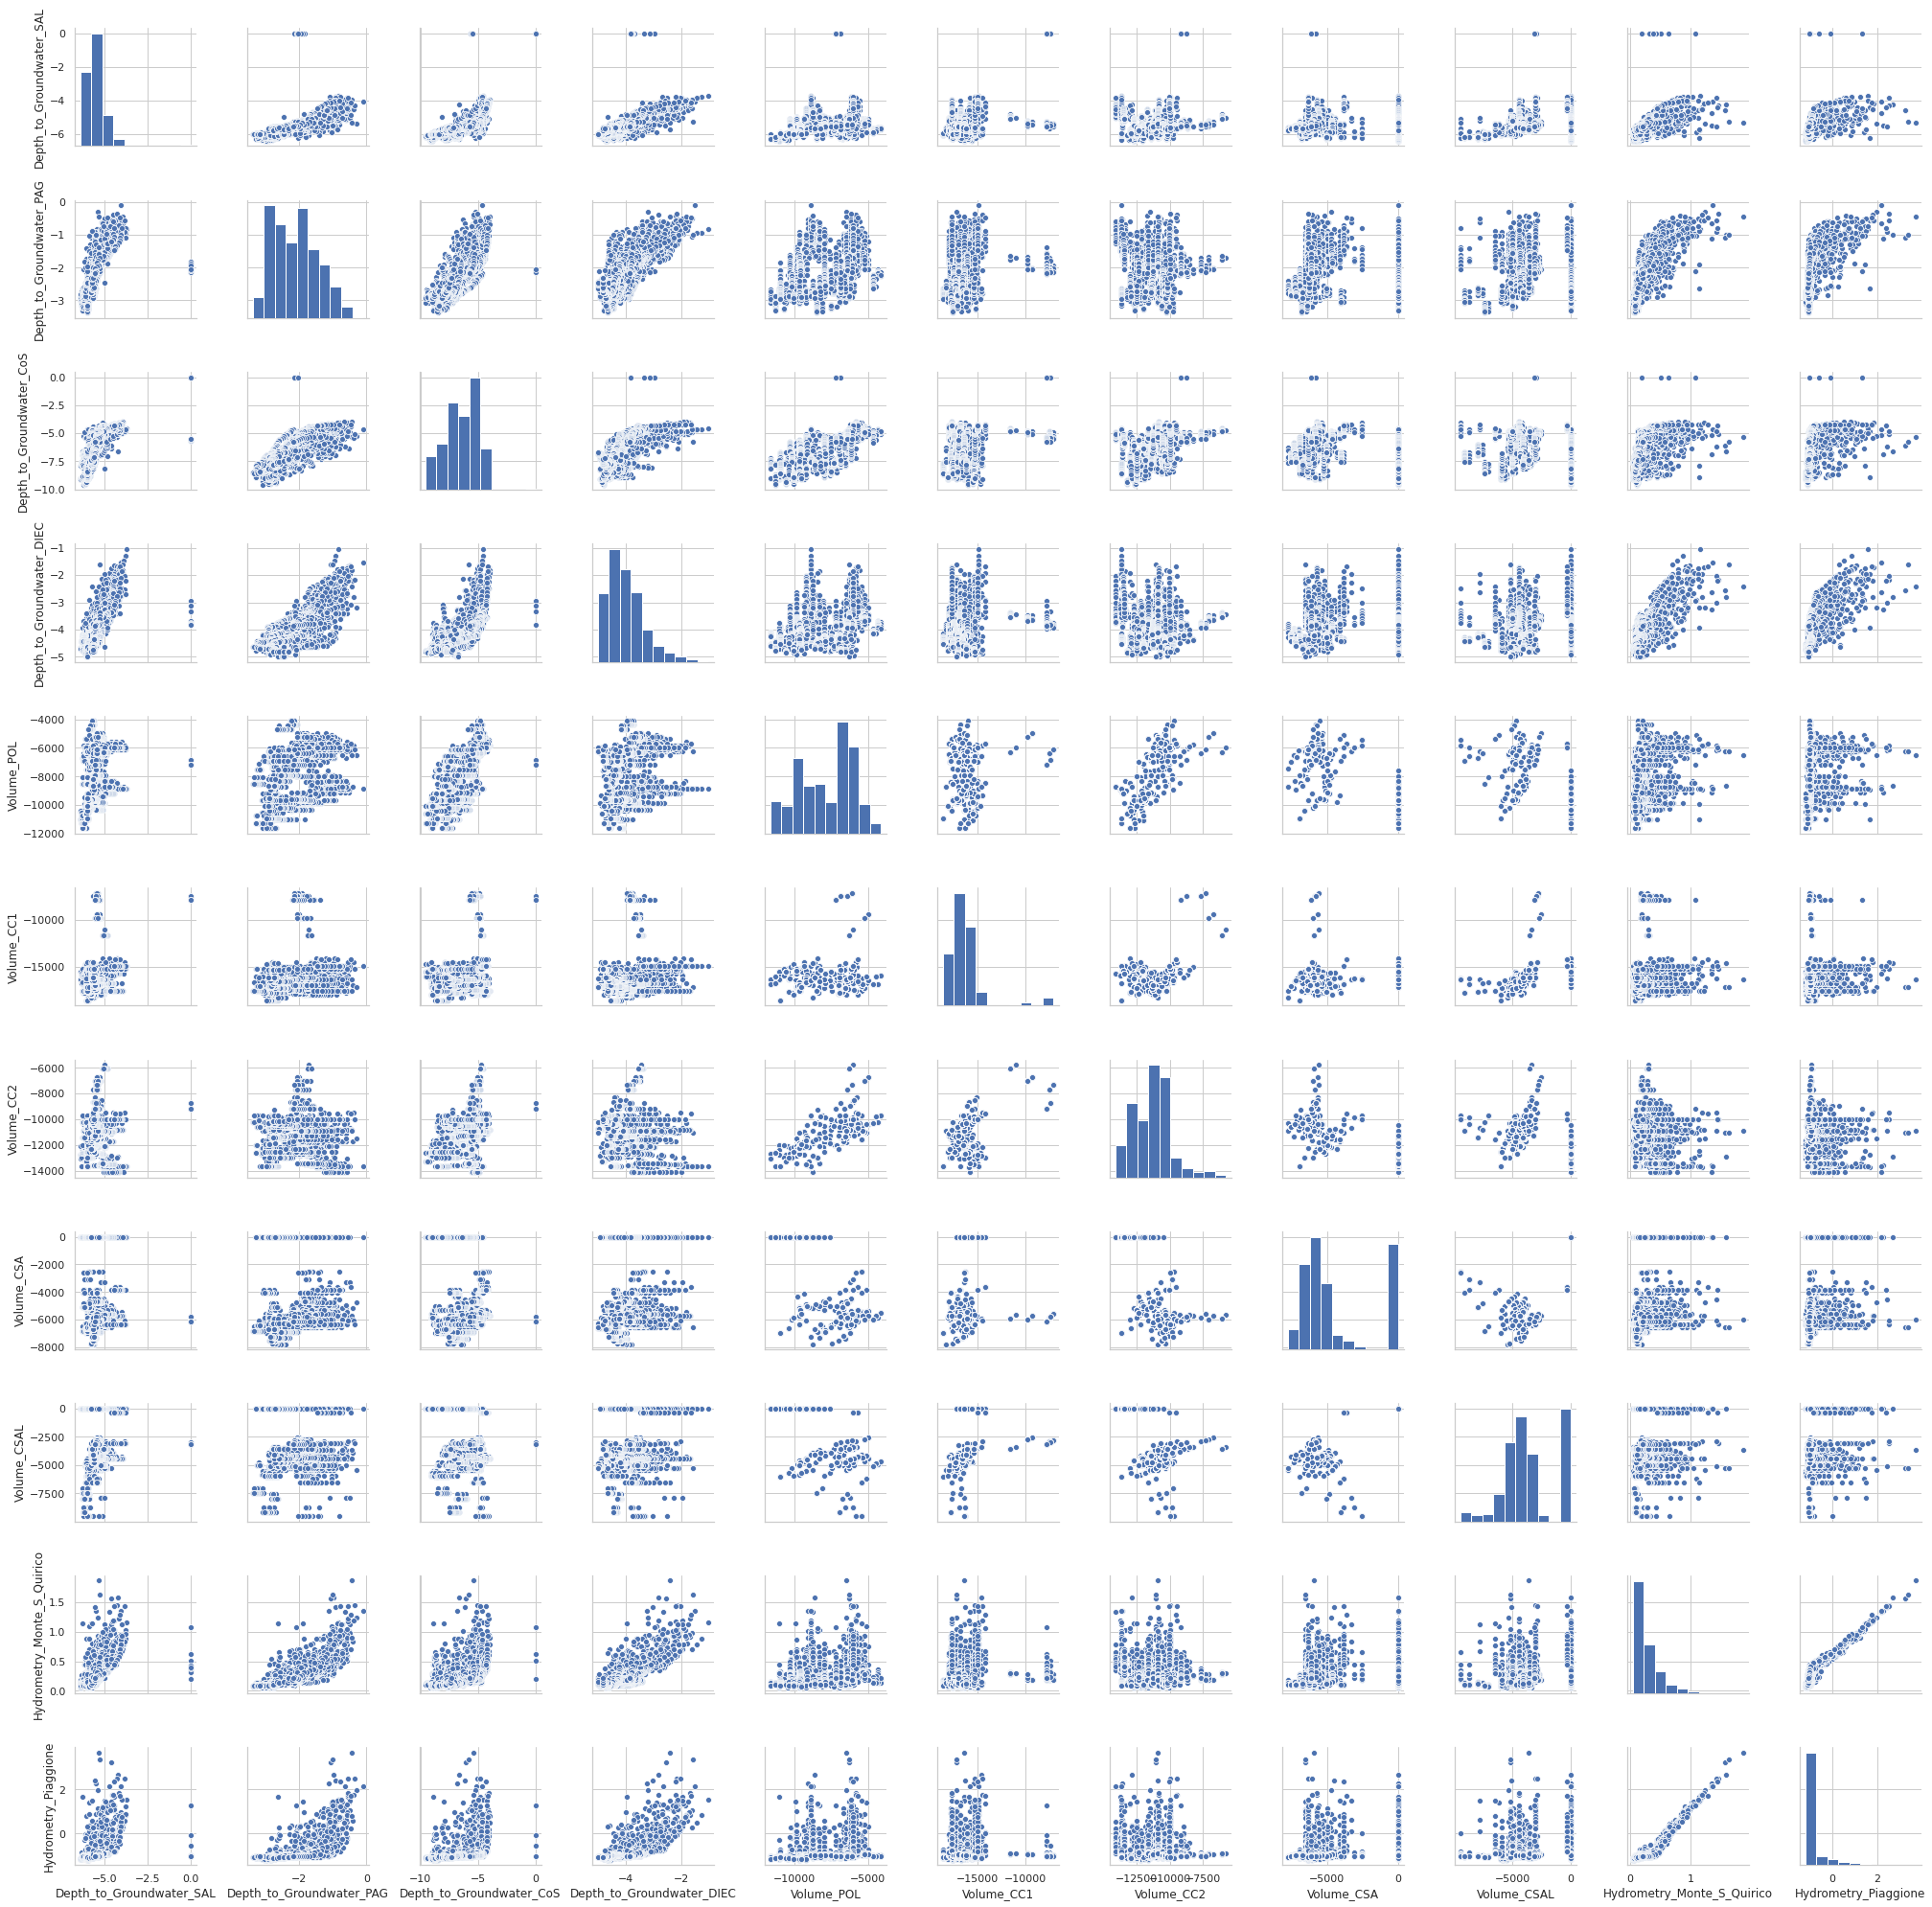

In [7]:
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols = ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC','Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']
df_drna = df.dropna()
sns.pairplot(df_drna[cols],size=2.5)


we can detect that there are anomalies in the Datasets in the columns of the Volumes taken, moreover the volume_CSA follow a similar normal distribution.

To quantify the linear relationship between the characteristics, a covariance matrix is created. In reality, the correlation matrix is identical to a covarinze matrix but calculated on standardized data.
The correlation matrix is a square matrix containing Pearson's coefficients 'r' which measure the linear dependence between pairs of characteristics. These coefficients vary between -1 and 1 where:
1 perfect linear correlation;
0 has no correlation;
-1 negative correlation;

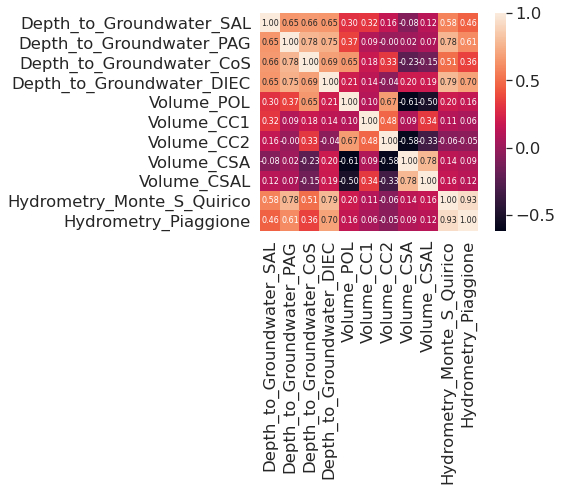

In [8]:
cm = np.corrcoef(df_drna[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size' : 8},yticklabels=cols,xticklabels=cols)



Apply linear regression on terms that have a very high value of the Pierson coefficient.

slope: 2.313
Intercept: -2.747


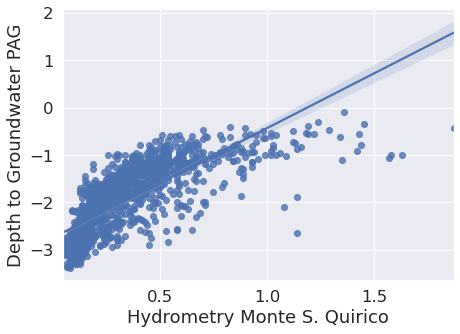

In [9]:
from sklearn.linear_model import LinearRegression
slt = LinearRegression()
X = df_drna[['Hydrometry_Monte_S_Quirico']].values
y = df_drna['Depth_to_Groundwater_PAG'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('Hydrometry Monte S. Quirico')
plt.ylabel('Depth to Groundwater PAG')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

Performance evaluation of linear regression models

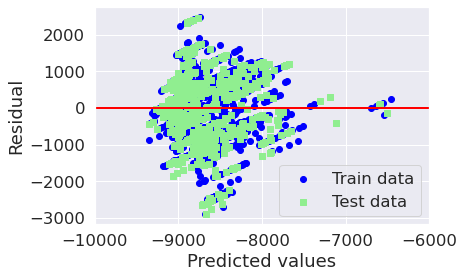

In [10]:

cols = ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']

vol = ['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']

df_drna = df.dropna()

df_new = df_drna[cols]
X = df_new.iloc[:,:].values
y = df_drna[vol].mean(axis=1).values
y = y.reshape(-1,1)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
slr=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue',marker='o',label='Train data')
plt.scatter(y_test_pred,y_test_pred-y_test, c = 'lightgreen',marker='s',label='Test data')
plt.hlines(0,xmin=-10000,xmax=-6000,lw=2,color='red')
plt.xlim([-10000,-6000])
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.legend(loc='best')

Evaluation MSE, RMSE and R ^ 2 estimators

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE Train: %.3f , Test: %.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('RMSE Train: %.3f , Test: %.3f' % (mean_squared_error(y_train,y_train_pred)**0.5,mean_squared_error(y_test,y_test_pred)**0.5))
print('R^2 Train: %.3f , Test: %.3f' % (r2_score(y_train,y_train_pred)**0.5,r2_score(y_test,y_test_pred)**0.5))

MSE Train: 866094.323 , Test: 867520.795
RMSE Train: 930.642 , Test: 931.408
R^2 Train: 0.371 , Test: 0.371


there are too many anomalies in the datasets.


Now try to apply a non-linear regression and assume a polynomial of 2nd and 3rd degree.

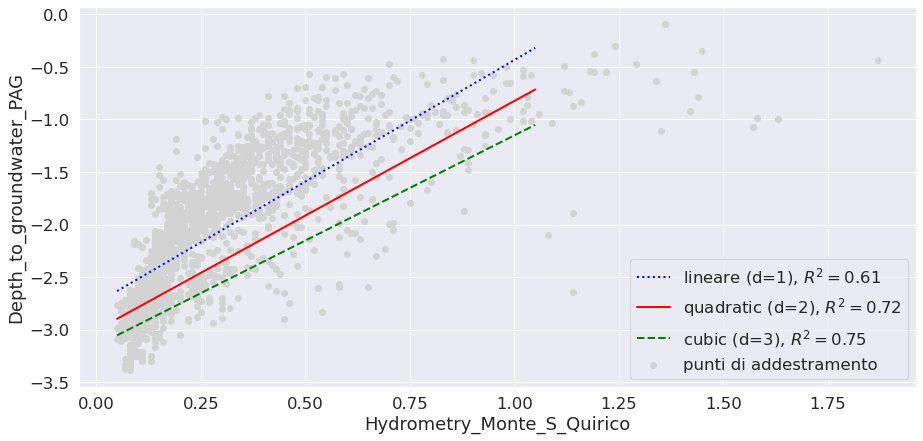

In [12]:
X = df_drna[['Hydrometry_Monte_S_Quirico']].values
y = df_drna['Depth_to_Groundwater_PAG'].values


from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Creo polinomio 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#Linear fit
X_fit = np.arange(X.min(),X.max(),1)[:, np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

#Quadratic fit
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

#cubic fit
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#plot results
fig=plt.figure(figsize=(15,7))
plt.scatter(X,y,label='punti di addestramento',color='lightgray')
plt.plot(X_fit,y_lin_fit,label='lineare (d=1), $R^2=%.2f$' % linear_r2,color='blue',lw=2,linestyle=':')
plt.plot(X_fit,y_quad_fit,label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,color='red',lw=2,linestyle='-')
plt.plot(X_fit,y_cubic_fit,label='cubic (d=3), $R^2=%.2f$' % cubic_r2,color='green',lw=2,linestyle='--')
plt.xlabel('Hydrometry_Monte_S_Quirico')
plt.ylabel('Depth_to_groundwater_PAG')
plt.legend(loc='best')
 

Random forest method

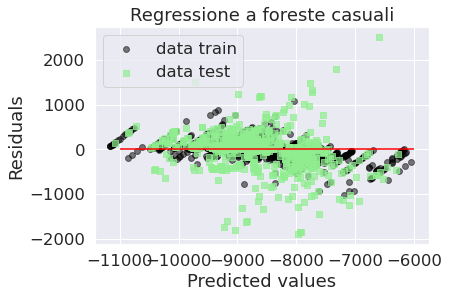

In [13]:
X = df_new.iloc[:,:].values
y = df_drna[vol].mean(axis=1).values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mean_squared_error(y_test,y_test_pred)
mean_squared_error(y_train,y_train_pred)-mean_squared_error(y_test,y_test_pred)
plt.scatter(y_train_pred,y_train_pred-y_train,c='black',marker='o',s=35,alpha=0.5,label='data train')
plt.scatter(y_test_pred,y_test_pred-y_test,c='lightgreen',marker='s',s=35,alpha=0.7,label='data test')
plt.hlines(y=0,xmin=-11000,xmax=-6000,color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Regressione a foreste casuali')
plt.legend(loc='best')




In [14]:
print('MSE Train: %.3f , Test: %.3f' %(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('RMSE Train: %.3f , Test: %.3f' %(mean_squared_error(y_train,y_train_pred)**0.5,mean_squared_error(y_test,y_test_pred)**0.5))
print('R^2 Train: %.3f , Test: %.3f' %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

MSE Train: 31998.485 , Test: 205699.278
RMSE Train: 178.881 , Test: 453.541
R^2 Train: 0.968 , Test: 0.795


Using the random forest method results in an improvement in the data

Estimation of the aquifer emptying time

In groundwater Hypothesis which rests above a horizontal plane waterproof and has a height H practically constant both in time and in space, so that you have anywhere speed and very limited gradients, the law of exhaustion with a good approximation is given by the equation:

Q=Qo e^(-kt)

Where Qo is the scope of the instant chosen as the origin of the times, Q is the flow rate at time t and k is a constant, characteristic storage aquifer, which is defined constant exhaustion.
Now we do not have the data of the flow rate measured daily. Still force the concept by considering that the flow rate is equal to the daily collected volume divided 24h.
Q [m ^ 3 / h] and t [h]

The equation is write in the form:

log(Q) = log(Qo)-kt



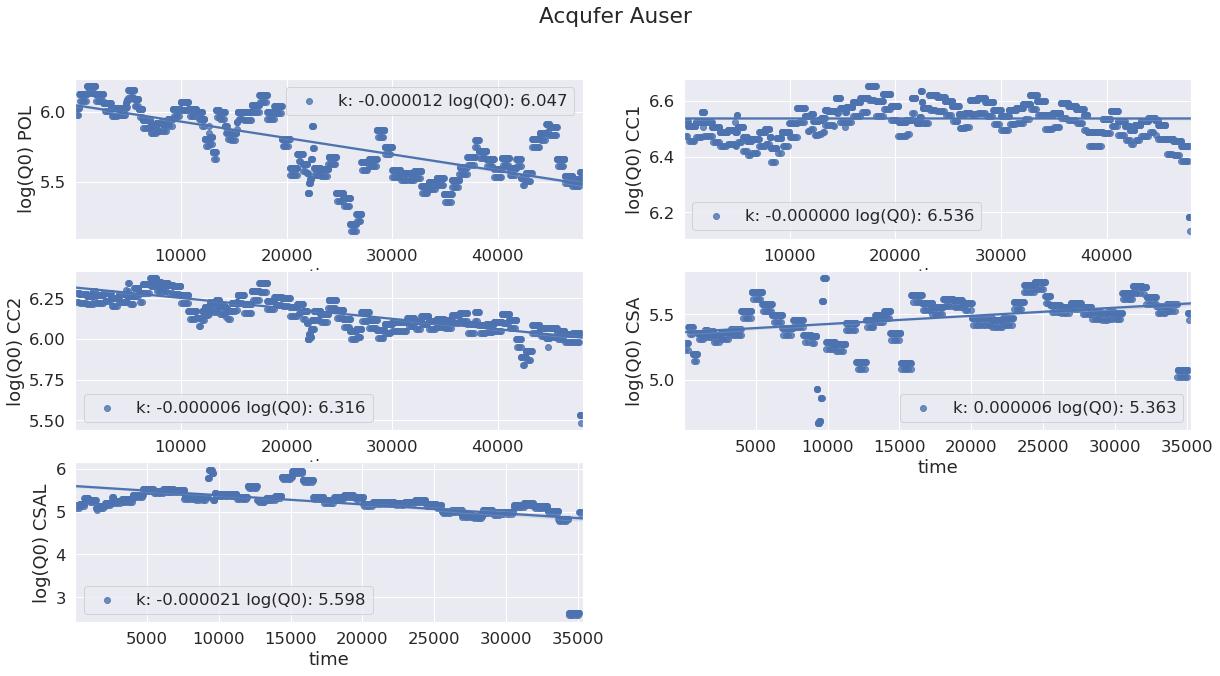

In [15]:

df_drna = df.dropna()
vol = df_drna[['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']]

X = vol.iloc[:,:].values
Q = -X/24
Q = Q[0:2001]
t = np.arange(24,(np.size(Q,0)+1)*24,24)
t = t.reshape(-1,1)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Acqufer Auser')
for i in range(1,np.size(vol,1)+1):
    q = Q[:,i-1]
    if sum(q==0)!=0:
        q = q[sum(q==0):]
        t = np.arange(24,(np.size(q)+1)*24,24)
        t = t.reshape(-1,1)
    q = np.log(q)
    slr = LinearRegression()
    slr.fit(t,q)
    plt.subplot(3,2,i)
    ylab = 'log(Q0) '+vol.columns[i-1][7:]
    sns.regplot(t,q,slr,label='k: %.6f log(Q0): %.3f' % (slr.coef_[0],slr.intercept_))
    plt.xlabel('time')
    plt.ylabel(ylab)
    plt.legend(loc='best')
 